<a href="https://colab.research.google.com/github/Lliazzie/Lliazzie-L.-Sunggay/blob/main/LabExercise5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
"""LabExercise5.ipynb

Automatically generated by Colab.

Original file is located at
    https://colab.research.google.com/drive/17K1QkHBjEyaszGbSQlYv2H4zGu3o-ezE#scrollTo=BCK_Hu7WO11-
"""


'LabExercise5.ipynb\n\nAutomatically generated by Colab.\n\nOriginal file is located at\n    https://colab.research.google.com/drive/17K1QkHBjEyaszGbSQlYv2H4zGu3o-ezE#scrollTo=BCK_Hu7WO11-\n'

In [28]:
# Import necessary libraries
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator


import numpy as np
from PIL import Image
import os

In [29]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [43]:
# Define path to the dataset
dataset_path = '/content/drive/My Drive/Colab Notebooks/LabExercise5/Dataset'

In [44]:
# Define parameters
img_width, img_height = 150, 150
batch_size = 25

train_ds = tf.keras.utils.image_dataset_from_directory(
  dataset_path,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = tf.keras.utils.image_dataset_from_directory(
  dataset_path,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

class_names = train_ds.class_names
print(class_names)

for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

normalization_layer = layers.Rescaling(1./255)

normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
print(np.min(first_image), np.max(first_image))

Found 50 files belonging to 2 classes.
Using 40 files for training.
Found 50 files belonging to 2 classes.
Using 10 files for validation.
['class1', 'class2']
(25, 150, 150, 3)
(25,)
0.0062585156 0.99929374


In [45]:
# Create the model
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [46]:
# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [47]:
# Model summary
model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_7 (Rescaling)     (None, 150, 150, 3)       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 150, 150, 16)      448       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 75, 75, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 75, 75, 32)        4640      
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 37, 37, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_11 (Conv2D)          (None, 37, 37, 64)       

In [48]:
# Train the model
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
2/2 [==============================] - 2s 557ms/step - loss: 0.7438 - accuracy: 0.4500 - val_loss: 0.7869 - val_accuracy: 0.6000
Epoch 2/10
2/2 [==============================] - 0s 26ms/step - loss: 0.6890 - accuracy: 0.6750 - val_loss: 0.3119 - val_accuracy: 0.9000
Epoch 3/10
2/2 [==============================] - 0s 25ms/step - loss: 0.2277 - accuracy: 0.9750 - val_loss: 0.2068 - val_accuracy: 0.9000
Epoch 4/10
2/2 [==============================] - 0s 25ms/step - loss: 0.1009 - accuracy: 1.0000 - val_loss: 0.1291 - val_accuracy: 1.0000
Epoch 5/10
2/2 [==============================] - 0s 25ms/step - loss: 0.0734 - accuracy: 1.0000 - val_loss: 0.0987 - val_accuracy: 0.9000
Epoch 6/10
2/2 [==============================] - 0s 25ms/step - loss: 0.0140 - accuracy: 1.0000 - val_loss: 0.1730 - val_accuracy: 0.9000
Epoch 7/10
2/2 [==============================] - 0s 30ms/step - loss: 0.0057 - accuracy: 1.0000 - val_loss: 0.1953 - val_accuracy: 0.9000
Epoch 8/10
2/2 [==========

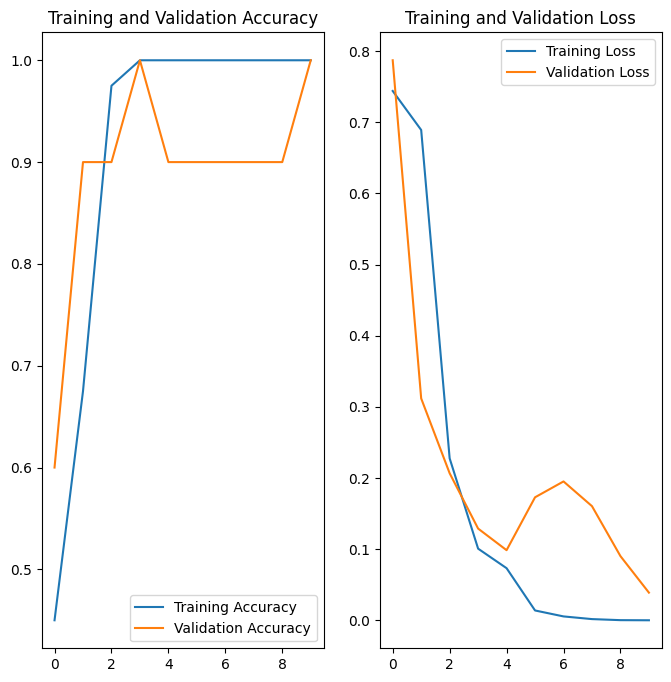

In [49]:
# Visualize training results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

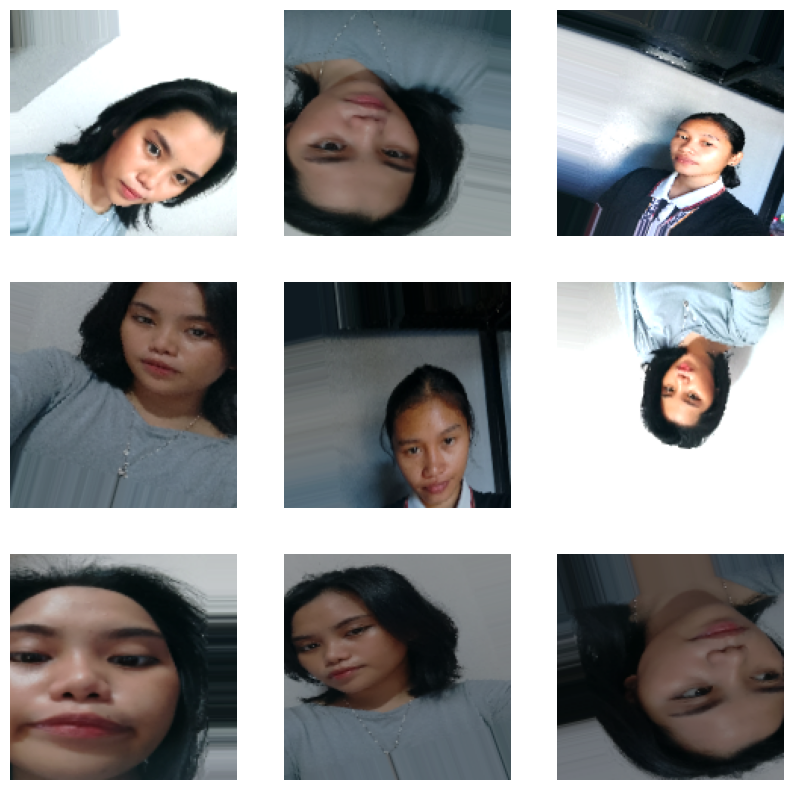

In [71]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define data augmentation parameters
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    brightness_range=(0.5, 1.5),
    fill_mode='nearest'
)

plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    augmented_images = datagen.flow(images, batch_size=1)
    for i in range(9):
        augmented_image = augmented_images.next()[0]
        augmented_image = tf.image.convert_image_dtype(augmented_image, tf.uint8)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_image)
        plt.axis("off")

sample_image_path = '/content/drive/My Drive/Colab Notebooks/LabExercise5/Me.jpeg'


In [38]:
# Load and preprocess the image
img = tf.keras.utils.load_img(
    sample_image_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

In [39]:
# Make predictions
predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

1/1 [==============================] - 0s 77ms/step


In [75]:
# Output the prediction
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

sample_image_path = '/content/drive/My Drive/Colab Notebooks/Labexercise5/ferlyn.jpeg'

This image most likely belongs to class2 with a 75.23 percent confidence.


In [77]:
import tensorflow as tf

# Corrected sample image path
sample_image_path = '/content/drive/My Drive/Colab Notebooks/LabExercise5/ferlyn.jpeg'

# Load and preprocess the image
img_height = 224  # Assuming you have defined this value
img_width = 224   # Assuming you have defined this value

img = tf.keras.utils.load_img(
    sample_image_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)


In [79]:
import tensorflow as tf

# Resize the image to match the input shape of the model
img_resized = tf.image.resize(img_array, (150, 150))

# Make predictions
predictions = model.predict(img_resized)
score = tf.nn.softmax(predictions[0])


1/1 [==============================] - 0s 222ms/step


In [80]:
# Output the prediction
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

sample_image_path = '/content/drive/My Drive/Colab Notebooks/LabExercise5/Ahyeon.jpg'


This image most likely belongs to class1 with a 100.00 percent confidence.


In [81]:
# Load and preprocess the image
img = tf.keras.utils.load_img(
    sample_image_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)


In [83]:
import tensorflow as tf

# Resize the image array to match the expected input shape
img_array_resized = tf.image.resize(img_array, (150, 150))

# Make predictions
predictions = model.predict(img_array_resized)
score = tf.nn.softmax(predictions[0])


1/1 [==============================] - 0s 19ms/step


Explaination:
  The result of the testing dataset was more accurate. We got a 100% confidence that the image of Ahyeon belongs to class1 which composed of my pictures. And my pairs output got a 75.23% confidence belongs to class2 which is compose of pictures of her.